<a href="https://colab.research.google.com/github/desdjajamahesa/fuzzy-kipas-fis/blob/main/notebooks/Mamdani_FIS_Sistem_Pengaturan_Kecepatan_Kipas_Otomatis_Berdasarkan_Suhu_dan_Kelembapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Masukkan nilai Suhu : 19
Masukkan nilai persentase Kelembapan : 70

Fuzzifikasi Suhu :
  Dingin : 0.05
  Normal : 0.9
  Panas : 0

Fuzzifikasi Kelembapan :
  Rendah : 0
  Sedang : 0
  Tinggi : 0.25

Hasil Inferensi Fuzzy :
  Lambat : 0
  Sedang : 0.05
  Cepat : 0.25

Aturan yang Berlaku :
  Jika Suhu Dingin dan Kelembapan Tinggi --> Sedang, dengan Hasil AND = 0.05
  Jika Suhu Normal dan Kelembapan Tinggi --> Cepat, dengan Hasil AND = 0.25

Kecepatan Kipas Secara Crisp : 79.73%
Kecepatan Kipas Secara Linguistik : Cepat




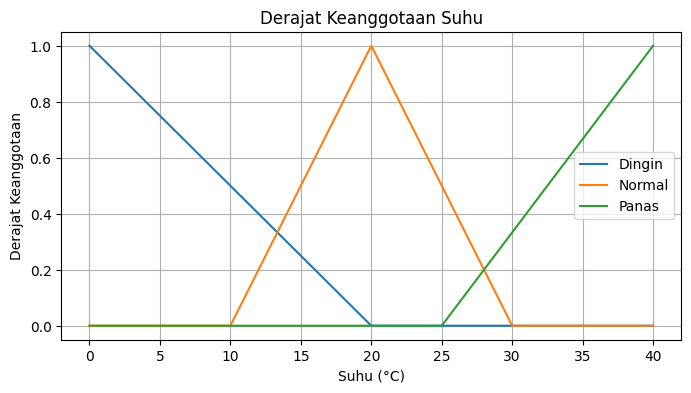

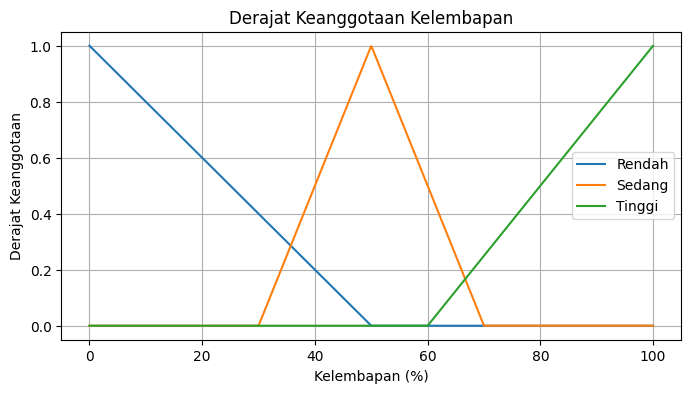

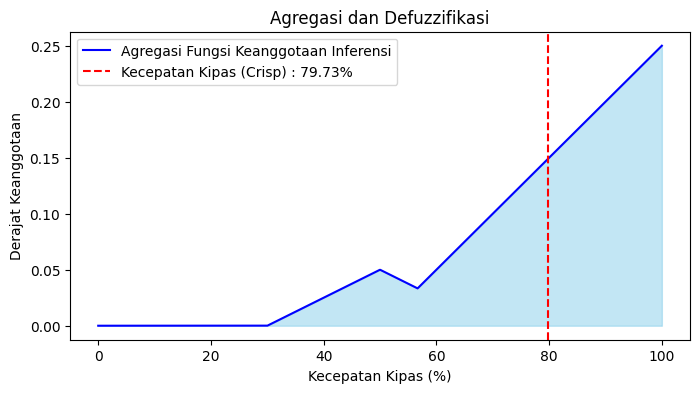

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fuzzifikasi_suhu(suhu):
    dingin = max(0, min(1, (20 - suhu) / 20))
    normal = max(0, min((suhu - 10) / 10, (30 - suhu) / 10))
    panas = max(0, min((suhu - 25) / 15, 1))
    return {'Dingin': dingin, 'Normal': normal, 'Panas': panas}

def fuzzifikasi_kelembapan(kelembapan):
    rendah = max(0, min(1, (50 - kelembapan) / 50))
    sedang = max(0, min((kelembapan - 30) / 20, (70 - kelembapan) / 20))
    tinggi = max(0, min((kelembapan - 60) / 40, 1))
    return {'Rendah': rendah, 'Sedang': sedang, 'Tinggi': tinggi}

def inferensi(suhu_fuzzy, kelembapan_fuzzy):
    aturan = [
        (min(suhu_fuzzy['Dingin'], kelembapan_fuzzy['Rendah']), "Jika Suhu Dingin dan Kelembapan Rendah --> Lambat"),
        (min(suhu_fuzzy['Dingin'], kelembapan_fuzzy['Sedang']), "Jika Suhu Dingin dan Kelembapan Sedang --> Lambat"),
        (min(suhu_fuzzy['Dingin'], kelembapan_fuzzy['Tinggi']), "Jika Suhu Dingin dan Kelembapan Tinggi --> Sedang"),
        (min(suhu_fuzzy['Normal'], kelembapan_fuzzy['Rendah']), "Jika Suhu Normal dan Kelembapan Rendah --> Lambat"),
        (min(suhu_fuzzy['Normal'], kelembapan_fuzzy['Sedang']), "Jika Suhu Normal dan Kelembapan Sedang --> Sedang"),
        (min(suhu_fuzzy['Normal'], kelembapan_fuzzy['Tinggi']), "Jika Suhu Normal dan Kelembapan Tinggi --> Cepat"),
        (min(suhu_fuzzy['Panas'], kelembapan_fuzzy['Rendah']), "Jika Suhu Panas dan Kelembapan Rendah --> Sedang"),
        (min(suhu_fuzzy['Panas'], kelembapan_fuzzy['Sedang']), "Jika Suhu Panas dan Kelembapan Sedang --> Cepat"),
        (min(suhu_fuzzy['Panas'], kelembapan_fuzzy['Tinggi']), "Jika Suhu Panas dan Kelembapan Tinggi --> Cepat"),
    ]
    hasil = {'Lambat': 0, 'Sedang': 0, 'Cepat': 0}
    aturan_berlaku = []
    for kekuatan_aturan, deskripsi in aturan:
        if kekuatan_aturan > 0:
            aturan_berlaku.append((deskripsi, round(kekuatan_aturan, 2)))
        if "Lambat" in deskripsi:
            hasil['Lambat'] = max(hasil['Lambat'], kekuatan_aturan)
        elif "Sedang" in deskripsi:
            hasil['Sedang'] = max(hasil['Sedang'], kekuatan_aturan)
        elif "Cepat" in deskripsi:
            hasil['Cepat'] = max(hasil['Cepat'], kekuatan_aturan)
    return hasil, aturan_berlaku

def defuzzifikasi(hasil_fuzzy):
    x = np.linspace(0, 100, 1000)
    lambat = np.maximum(0, np.minimum(1, (50 - x) / 50))
    sedang = np.maximum(0, np.minimum((x - 30) / 20, (70 - x) / 20))
    cepat = np.maximum(0, np.minimum((x - 50) / 50, 1))

    agregasi = np.maximum(hasil_fuzzy['Lambat'] * lambat,
                          np.maximum(hasil_fuzzy['Sedang'] * sedang,
                                     hasil_fuzzy['Cepat'] * cepat))

    output_crisp = np.sum(agregasi * x) / np.sum(agregasi)
    return round(output_crisp, 2), agregasi, x

# INPUT NILAI SUHU DAN KELEMBAPAN
suhu = float(input("Masukkan nilai Suhu : "))
kelembapan = float(input("Masukkan nilai persentase Kelembapan : "))

# FUZZIFIKASI
suhu_fuzzy = fuzzifikasi_suhu(suhu)
kelembapan_fuzzy = fuzzifikasi_kelembapan(kelembapan)
print("\nFuzzifikasi Suhu :")
for key, value in suhu_fuzzy.items():
    print(f"  {key} : {value}")
print("\nFuzzifikasi Kelembapan :")
for key, value in kelembapan_fuzzy.items():
    print(f"  {key} : {value}")

# INFERENSI
hasil_fuzzy, aturan_berlaku = inferensi(suhu_fuzzy, kelembapan_fuzzy)
print("\nHasil Inferensi Fuzzy :")
for key, value in hasil_fuzzy.items():
    print(f"  {key} : {value}")
print("\nAturan yang Berlaku :")
for deskripsi, kekuatan in aturan_berlaku:
    print(f"  {deskripsi}, dengan Hasil AND = {kekuatan}")

# DEFUZZIFIKASI
output_crisp, agregasi, x = defuzzifikasi(hasil_fuzzy)
print("\nKecepatan Kipas Secara Crisp :", f"{output_crisp}%")

# HASIL KECEPATAN KIPAS SECARA LINGUISTIK
output_linguistik = max(hasil_fuzzy, key=hasil_fuzzy.get)
print("Kecepatan Kipas Secara Linguistik :", output_linguistik)
print("\n")

# VISUALISASI DERAJAT KEANGGOTAAN SUHU
x_suhu = np.linspace(0, 40, 1000)
plt.figure(figsize=(8, 4))
plt.plot(x_suhu, [max(0, min(1, (20 - xi) / 20)) for xi in x_suhu], label="Dingin")
plt.plot(x_suhu, [max(0, min((xi - 10) / 10, (30 - xi) / 10)) for xi in x_suhu], label="Normal")
plt.plot(x_suhu, [max(0, min((xi - 25) / 15, 1)) for xi in x_suhu], label="Panas")
plt.title("Derajat Keanggotaan Suhu")
plt.xlabel("Suhu (°C)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()
plt.show()
print("\n")

# VISUALISASI DERAJAT KEANGGOTAAN KELEMBAPAN
x_kelembapan = np.linspace(0, 100, 1000)
plt.figure(figsize=(8, 4))
plt.plot(x_kelembapan, [max(0, min(1, (50 - xi) / 50)) for xi in x_kelembapan], label="Rendah")
plt.plot(x_kelembapan, [max(0, min((xi - 30) / 20, (70 - xi) / 20)) for xi in x_kelembapan], label="Sedang")
plt.plot(x_kelembapan, [max(0, min((xi - 60) / 40, 1)) for xi in x_kelembapan], label="Tinggi")
plt.title("Derajat Keanggotaan Kelembapan")
plt.xlabel("Kelembapan (%)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.grid()
plt.show()
print("\n")

# VISUALISASI AGREGASI DAN JUGA DEFUZZIFIKASI
plt.figure(figsize=(8, 4))
plt.plot(x, agregasi, label='Agregasi Fungsi Keanggotaan Inferensi', color='blue')
plt.fill_between(x, 0, agregasi, color='skyblue', alpha=0.5)
plt.title("Agregasi dan Defuzzifikasi")
plt.axvline(output_crisp, color='red', linestyle='--', label=f'Kecepatan Kipas (Crisp) : {output_crisp}%')
plt.xlabel("Kecepatan Kipas (%)")
plt.ylabel("Derajat Keanggotaan")
plt.legend()
plt.show()